# Цифровая обработка сигналов - 8

| **Title**         | Digital signal processing |
| --- | --- |
| **Author**        | Alexander Kapitanov       |
| **Contact**       | sallador@bk.ru            |
| **Project lang**  | Python                    |
| **Packages**      | numpy, scipy, matplotlib  |
| **License**       | GNU GPL 3.0               |


## Введение

Перед вами обучающий материал по основам **цифровой обработки сигналов** с использованием средств языка программирования Python. Предполагается, что читатель имеет базовые знания из области высшей математики, а также владеет языком Python и хотя бы поверхностно знает различные python-библиотеки - numpy/scipy, matplotlib и другие. 

Для пользователей MATLAB / GNU Octave освоение материала с точки зрения программного кода не составит труда, поскольку основные функции и их атрибуты во многом идентичны и схожи с методами из python-библиотек.

## Многоскоростная обработка сигналов

В предыдущих разделах мы изучили цифровые фильтры - с конечной импульсной характеристикой (КИХ) и с бесконечной импульсной характеристикой (БИХ). Многоскоростная обработка сигналов (multirate processing) предполагает, что в процессе линейного преобразования цифровых сигналов возможно изменение частоты дискретизации в сторону уменьшения или увеличения, либо в дробное число раз. Это приводит к более эффективной обработке сигналов, так как открывается возможность использования минимально допустимых частот дискретизации и, как следствие, значительного уменьшения требуемой вычислительной производительности проектируемой цифровой системы. Для преобразования частоты дискретизации в **дробное число** раз необходимо использовать каскады повышения и понижения частоты дискретизации совместно. 

Основными составными элементами системы многоскоростной ЦОС являются компрессоры и экспандеры частоты дискретизации, понижающие и соответственно повышающие частоту дискретизации преобразуемых цифровых последовательностей. При этом, если понижение частоты дискретизации в R раз (R – целое число) с помощью компрессора сводится к тому, что в выходном сигнале сохраняются только отсчеты с номерами, кратными R, то повышение частоты дискретизации в R раз с помощью экспандера предполагает размещение (R-1) нулей между каждой парой соседних отсчетов входного сигнала.

**Децимация** (прореживание) – понижение частоты дискретизации. Понижение частоты дискретизации получается путем сохранения одного отсчета входной последовательности и удалением R-1 отсчетов последовательности сигнала, что выражается следующей формулой:

$ y[n] = x[nR] $ 

Простая компрессия цифровых последовательностей приводит к наложению периодических составляющих спектра «прореженного» сигнала вследствие эффекта отражения (ухудшаются спектральные характеристики выходного сигнала). Следовательно, понижение частоты дискретизации требует подключения низкочастотного фильтра (ФНЧ). Таким образом, структурная схема фильтра дециматора получается путем каскадного соединения ФНЧ и компрессора. Тогда, формула, связывающая входной и выходной сигналы, преобразуется к виду:

$ y[n] = \sum_{k=0}^{N-1}x[nR-k]\cdot h[k] $ , 

где 
- $h[k]$ - отсчёты фильтра с конечной импульсной характеристикой, 
- $x[nR-k]$ - прореженный входной сигнал,

Выходной сигнал фильтра дециматора сохраняет только каждый R-й отсчет. Следовательно, для класса фильтров с конечной импульсной характеристикой (КИХ-фильтров), когда пределы суммирования принимают конечные значения, потенциально возможно уменьшение приведенных вычислительных затрат в R раз. Это выражается в уменьшении скорости обработки или в уменьшении количества затрачиваемых логических ресурсов, если рассматривать микросхемы ПЛИС. 

**Интерполяция** – повышение частоты дискретизации. Операция увеличения частоты дискретизации задается введением R-1 нулевых отсчетов во входную последовательность и выражается формулой:
 
$
y[n] = 
 \begin{cases}
   x[n/R] , n = 0, L, 2L, ...\\
   0 , n \ne 0, L, 2L, ...
 \end{cases}
$

Поскольку размещение нулей эквивалентно сжатию в R раз и периодическому продолжению спектра входного сигнала, то при  повышении частоты дискретизации требуется также подключение ФНЧ. Таким образом, структурная схема фильтра интерполятора получается путем каскадного соединения экспандера и ФНЧ, а формула для выходного сигнала преобразуется к виду:

$ y[n] = \sum_{k=0}^{N-1}x[nR-k]\cdot h[k] $ , 

где 
- $h[k]$ - отсчёты фильтра с конечной импульсной характеристикой, 
- $x[nR-k]$ - входной сигнал, со вставкой нулей между отсчётами.

Выходной сигнал фильтра-интерполятора использует «прореженную» в R раз входную последовательность. Следовательно, вычислительные затраты и память КИХ-фильтра потенциально уменьшаются в R раз.


### CIC фильтры

В предыдущем разделе рассматривался класс **однородных КИХ-фильтров**. С их помощью возможно проектировать фильтры для изменения частоты дискретизации. Для реализации этих фильтров не требуется операция умножения, следовательно фильтр работает достаточно быстро и довольно хорошо реализуется на таких устройствах, как ПЛИС.

Недостатком таких фильтров является большой уровень боковых лепестков. Боковые лепестки АЧХ подавляются путем каскадирования фильтров, при этом положение нулей не меняется, а меняется только соотношение уровней главного и бокового лепестков, относительный уровень боковых лепестков уменьшается при перемножении АЧХ.

Второй недостаток однородных фильтров – **непрямоугольная** форма АЧХ. Чтобы сделать ее более прямоугольной, используют корректирующий КИХ-фильтр, таким образом форма главного лепестка становится более прямоугольной, но увеличивается уровень боковых лепестков.

Однородные фильтры, образуя каскад интегратора и дифференцирующего звена, называются **интегрально-гребенчатыми фильтрами (CIC, Cascaded integrator–comb)**. Далее по тексту будем использовать эту терминологию.

CIC фильтр состоит из двух базовых звеньев: интегратор и гребенчатый фильтр (дифференциатор). Интегрирующее звено (int) представляет собой обычный БИХ-фильтр первого порядка, выполненный как самый простой аккумулятор. Гребенчатый фильтр (comb) является КИХ-фильтром первого порядка. На следующем рисунке представлены схемы интегратора и дифференцирующего звена:

<img src="https://raw.githubusercontent.com/capitanov/dsp-theory/master/img/cic_comb_int.svg?sanitize=true" alt="Comb & Integrator" style="width: 70%;"/>

Между интегратором и гребенчатым фильтром часто ставится узел повышения или понижения частоты дискретизации в целое число раз — $R$. 
- В случае понижения частоты дискретизации из входной последовательности выбирается каждый R-отсчет, образуя прореженную выходную последовательность.
- В случае повышения частоты дискретизации между отсчетами входной последовательности просто вставляются нули, которые затем сглаживаются в интегрирующей секции, образуя последовательность на увеличенной частоте дискретизации.

Формулы для передаточной и амплитудно-частотной характеристик фильтра:

#### Передаточная характеристика

$ H(z) = (\sum_{k=0}^{RM-1}z^{-k})^N = [\frac{1-z^{-RM}}{1-z^{-1}}]^{N}$

#### Формула АЧХ

$ \| H(f) \| = [\frac{sin(\pi RMf)}{sin(\pi f)}]^{N}$

### CIC фильтр-дециматор

Если CIC-фильтр используется для понижения частоты дискретизации, то он называется дециматором. В таком случае первым звеном идет интегратор, затем происходит понижение частоты дискретизации и, наконец, идет звено дифференцирующего фильтра.

<img src="https://raw.githubusercontent.com/capitanov/dsp-theory/master/img/cic_decimator.svg?sanitize=true" alt="CIC Decimator" style="width: 70%;"/>

### CIC фильтр-интерполятор

Если CIC-фильтр используется для повышения частоты дискретизации, то он называется интерполятором. В таком случае дифференцирующее звено стоит на первом месте, затем происходит повышение частоты дискретизации и, наконец, идет звено интегрирующего фильтра.

<img src="https://raw.githubusercontent.com/capitanov/dsp-theory/master/img/cic_interp.svg?sanitize=true" alt="CIC Interpolator" style="width: 70%;"/>

Каскадное соединение интегратора и гребенчатого фильтра без операций децимации и интерполяции называется **фильтром «скользящего среднего»**. Уровень первого бокового лепестка такого фильтра составляет всего **-13 дБ**, что достаточно мало для серьезных задач ЦОС. В большинстве практических задач параметр $M = 1$. Ниже по тексту будет представлена реализация фильтров именно с этим значением параметра.

В силу линейности математических операций, происходящих в CIC фильтре возможно каскадное соединение нескольких фильтров подряд. Это дает пропорциональное уменьшение уровня боковых лепестков, но также увеличивает "завал" главного лепестка амплитудно-частотной характеристики. Таким образом, при N-каскадном соединении однотипных CIC фильтров происходит перемножение идентичных передаточных характеристик. Как правило, секции интеграторов и гребенчатых фильтров объединяются вместе по типу. Например, сначала последовательно ставится $N$ секций однотипных интеграторов, затем N секций однотипных дифференцирующих фильтров. На следующем рисунке изображен CIC фильтр-дециматор третьего порядка $N = 3$. 

<img src="https://raw.githubusercontent.com/capitanov/dsp-theory/master/img/cic_decim_order.svg?sanitize=true" alt="CIC N-order" style="width: 90%;"/>

На следующем рисунке приведена АЧХ фильтра первого порядка $N=1$ при различных параметрах коэффициента децимации $R$:

In [1]:
import numpy as np               # Import numpy 
import matplotlib.pyplot as plt  # Import matplotlib
from scipy.signal import freqz
from scipy.fftpack import fft
%matplotlib inline

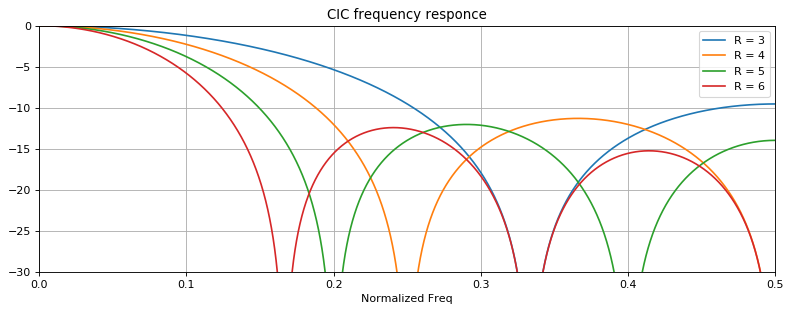

In [2]:
N = 2**15
f = np.linspace(0, 0.5, N, endpoint=True)

# Create CIC filter as recursive FIR
b = [1, 1, 1]

# Plot results
plt.figure(figsize=(10, 4), dpi=80)
for i in range(4):
    _, h = freqz(b, 1, worN=N)
    h = np.abs(h)
    plt.plot(f, 20*np.log10(h/np.max(h)+10e-12), label=f'R = {len(b)}')
    plt.xlim([0, 0.5])
    plt.ylim([-30, 0])
    plt.grid(True)
    b.append(1)
plt.legend(loc='upper right')
plt.xlabel('Normalized Freq')
plt.title('CIC frequency responce')
plt.tight_layout()

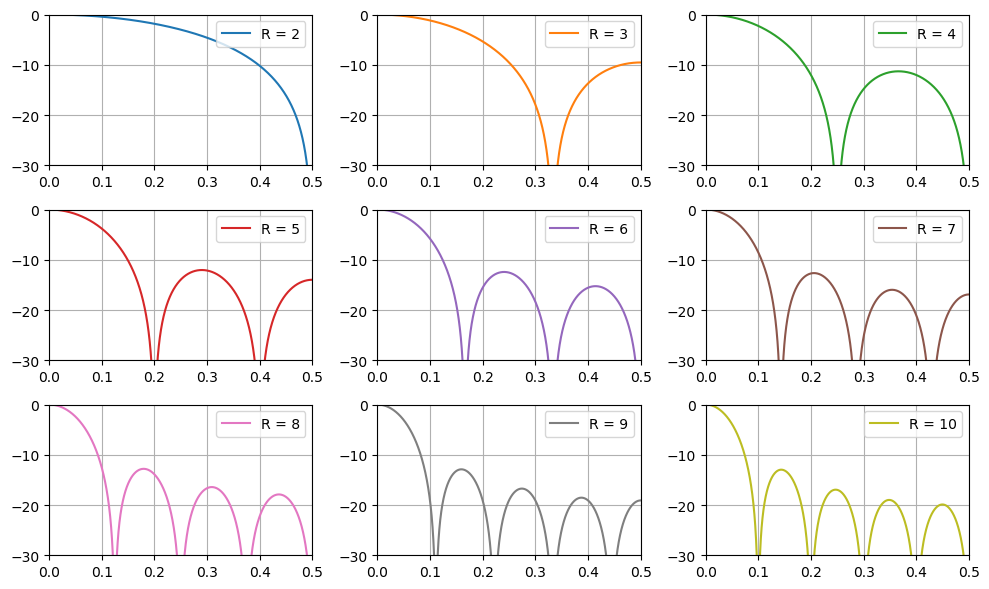

In [3]:
b = [1, 1]

# Plot results
plt.figure(figsize=(10, 6), dpi=100)
for i in range(9):
    _, h = freqz(b, 1, worN=N)
    h = np.abs(h)
    plt.subplot(3, 3, i+1)
    plt.plot(f, 20*np.log10(h/np.max(h)+10e-12), label=f'R = {len(b)}', color='C'+str(i))
    plt.xlim([0, 0.5])
    plt.ylim([-30, 0])
    plt.grid(True)
    b.append(1)
    plt.legend(loc='upper right')
plt.tight_layout()

АЧХ CIC фильтра полностью эквивалентна частотной характеристике FIR фильтра с прямоугольной импульсной характеристикой (ИХ). Как видно из предыдущего примера, коэффициенты числителя - массив единиц, а коэффициент знаменателя также равен единице.

Общая ИХ фильтра определяется как свертка всех импульсных характеристик каскадов связки интегратора и гребенчатого фильтра. С ростом порядка CIC фильтра, его ИХ интегрируется соответствующее число раз. Таким образом, для CIC фильтра первого порядка ИХ – прямоугольник, для фильтра второго порядка ИХ – равнобедренный треугольник, для третьего порядка ИХ – парабола и т.д. 

### Python реализация CIC фильтра

К сожалению, на сегодняшний день в Python пакетах для математических вычислений numpy/scipy отсутствует ряд операций цифровой обработки сигналов. В частности, отсутствует реализация CIC фильтров, осуществляющих задачи децимации и интерполяции. В связи с этим, разработан класс `CicFilter`, который принимает входную последовательность и содержит два метода:
- `decimator(r, n)` - фильтр-дециматор, 
- `interpolator(r, n)` - фильтр-интерполятор. 

где `r` - коэффициент децимации или интерполяции, `n` - порядок фильтра, (параметр `m = 1` всегда). 

In [4]:
class CicFilter:
    """
    Cascaded Integrator-Comb (CIC) filter is an optimized class of
    finite impulse response (FIR) filter.
    CIC filter combines an interpolator or decimator, so it has some
    parameters:

    R - decimation or interpolation ratio,
    N - number of stages in filter (or filter order)
    M - number of samples per stage (1 or 2)*

    * for this realisation of CIC filter just leave M = 1.

    CIC filter is used in multi-rate processing. In hardware
    applications CIC filter doesn't need multipliers, just only
    adders / subtractors and delay lines.

    Equation for 1st order CIC filter:
    y[n] = x[n] - x[n-RM] + y[n-1].


    Parameters
    ----------
    x : np.array
        input signal
    """

    def __init__(self, x):
        self.x = x

    def decimator(self, r, n):
        """
        CIC decimator: Integrator + Decimator + Comb

        Parameters
        ----------
        r : int
            decimation rate
        n : int
            filter order
        """

        # integrator
        y = self.x[:]
        for i in range(n):
            y = np.cumsum(y)

        # decimator

        y = y[::r]
        # comb stage
        return np.diff(y, n=n, prepend=np.zeros(n))

    def interpolator(self, r, n, mode=False):
        """
        CIC inteprolator: Comb + Decimator + Integrator

        Parameters
        ----------
        r : int
            interpolation rate
        n : int
            filter order
        mode : bool
            False - zero padding, True - value padding.
        """

        # comb stage
        y = np.diff(self.x, n=n,
                    prepend=np.zeros(n), append=np.zeros(n))

        # interpolation
        if mode:
            y = np.repeat(y, r)
        else:
            y = np.array([i if j == 0 else 0 for i in y for j in range(r)])

        # integrator
        for i in range(n):
            y = np.cumsum(y)

        if mode:
            return y[1:1 - n * r]
        else:
            return y[r - 1:-n * r + r - 1]

Проведем тестирование разработанного класса `CicFilter`. Для это создадим вспомогательную функцию для построения графиков.

In [5]:
def plot_filter(r=None, n=None, samples=100, mode=None):
    # Create signal
    tt = np.linspace(0, 1, samples)
    
    np.random.seed(1)
    if mode == 'Decimator':
        x = 1.5 * np.sin(4 * np.pi * tt) + 1.7 * np.sin(8.3 * np.pi * tt)
        x += 0.9*np.random.randn(samples)
    if mode == 'Interpolator':
        x = np.sin(1.7 * np.pi * tt) + 1.7 * np.sin(5.3 * np.pi * tt)
        x += 0.3*np.random.randn(samples)
    
    # Apply filter
    clf = CicFilter(x)
    
    if mode == 'Decimator':
        zz = [clf.decimator(i, j) for i, j in zip(r, n)]
    if mode == 'Interpolator':
        zz = [clf.interpolator(i, j, mode=True) for i, j in zip(r, n)]

    # Plot figure
    plt.figure(figsize=(12, 8), dpi=80)
    # plt.title(mode)
    plt.subplot(4, 2, 1)
    plt.title('Change N:')
    plt.plot(x, '-', color='C0', label='Signal')
    plt.xlim([0, samples-1])
    plt.legend(loc='upper right')
    plt.grid(True)

    for j in range(len(r)):
        plt.subplot(4, 2, 2+j)
        if j == 0:
            plt.title('Change R:')
        plt.stem(zz[j],
                 use_line_collection=True,
                 linefmt='C2',
                 basefmt='C0',
                 label=f'R = {r[j]}, N = {n[j]}'
                 )
        plt.grid(True)
        plt.legend(loc='upper right')
    plt.tight_layout(True)


### Python CIC фильтр-дециматор

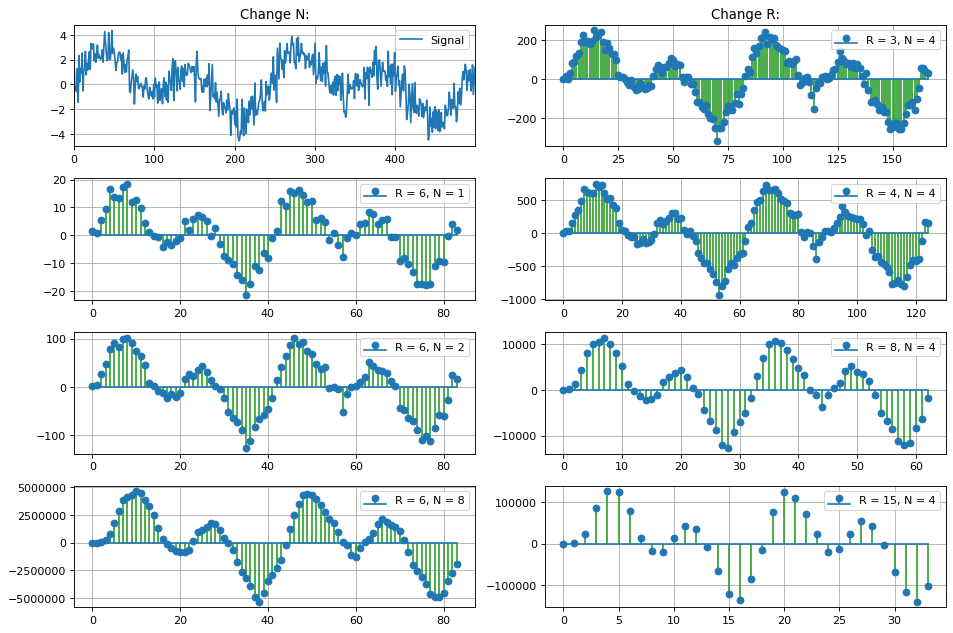

In [6]:
# Number os samples
N = 500

# Filter parameters (length of lists should be same):
flt_r = [3, 6, 4, 6, 8, 6, 15]
flt_n = [4, 1, 4, 2, 4, 8, 4]

plot_filter(r=flt_r, n=flt_n, samples=N, mode='Decimator')

### Python CIC фильтр-интерполятор

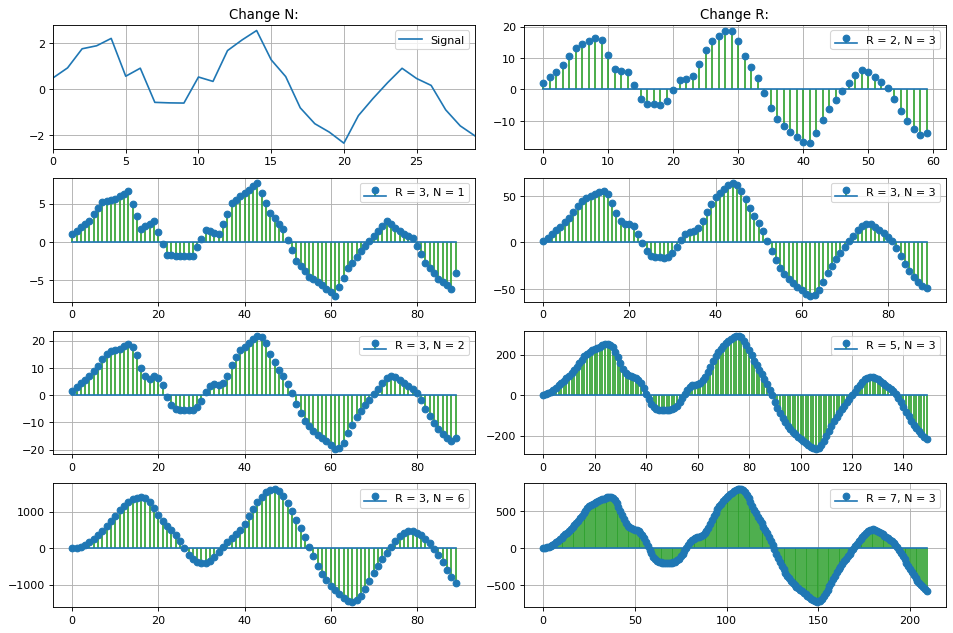

In [7]:
# Number os samples
N = 30

# Filter parameters (length of lists should be same):
flt_r = [2, 3, 3, 3, 5, 3, 7]
flt_n = [3, 1, 3, 2, 3, 6, 3]

plot_filter(r=flt_r, n=flt_n, samples=N, mode='Interpolator')

### Рост разрядности данных

К несчастью, увеличение величины задержки $M$ в гребенчатой структуре и увеличение порядка фильтра $N$ приводят к росту коэффициента передачи. Это в свою очередь приводит к увеличению разрядности на выходе фильтра. В задачах ЦОС, где применяются CIC фильтры с целочисленной арифметикой нужно всегда об этом помнить и следить, чтобы передаваемые сигналы не выходили за используемую разрядную сетку. К примеру, негативный эффект роста разрядности проявляется в значительном увеличении используемых ресурсов ПЛИС. Также следует отметить, что сумматор в цепи интегратора должен быть без переполнения.

Интерполятор: использование ограниченной точности не влияет на внутреннюю разрядность регистров, масштабируется только последний выходной каскад. Существенный рост разрядности данных происходит в секциях интеграторов.

$ B_{OUT} = ceil[Nlog_{2}(RM)+B_{IN}] $

Дециматор: CIC фильтр-дециматор очень чувствителен к параметрам $M$, $R$ и $N$, от которых зависит разрядность промежуточных и выходных данных. И дифференцирующее звено, и интегратор влияют на конечную разрядность выходного сигнала. 

$ B_{OUT} = ceil[log_{2}(\frac{(RM)^{N}}{R})+B_{IN}] $

В этих формулах: 
- $B_{IN}$ — разрядность входных данных, 
- $B_{OUT}$ — разрядность выходных данных,  
- $R$ — коэффициент дискретизации, 
- $M$ — параметр задержки, 
- $N$ — порядок фильтра (количество каскадов). 
- `ceil` - математическая операция округления в сторону большего значения.

### Python Resampling

**Программная реализация методов децимации и интерполяции**.

Применение дециматоров и интерполяторов производится с помощью некоторых функций из пакета `scipy.signal`. Перечислим основные функции:

| **Function**      | **Description** | 
| --- | --- | 
| `decimate(x, q[, n, ftype, axis, zero_phase])`    | Децимация сигнала с применением сглаживающего фильтра ФНЧ | 
| `resample(x, num[, t, axis, window])`             | Изменение количества отсчетов сигнала `x` на `q` (методом Фурье) | 
| `upfirdn(h, x[, up, down, axis])`                 | Трехступенчатая обработка: Интерполяция, фильтрация (КИХ), децимация | 
| `resample_poly(x, up, down[, axis, window])`      | Изменение количества отсчетов сигнала с использованием полифазного фильтра |

#### Децимация

Метод `decimate` позволяет децимировать сигнал с применением сглаживающего фильтра нижних частот:

 - `x` - входной сигнал (одномерный или многомерный вектор данных 
 - `q` - целочисленный коэффициент децимации 
 - `n` - целочисленный порядок фильтра, по умолчанию равен 8 для БИХ-фильтров и 20 для КИХ-фильтров
 - `ftype` - выбор фильтра: БИХ - `iir` или КИХ - `fir`
 - `axis` - ось, вдоль которой производится децимация (для многомерных массивов) 
 - `zero_phase` - нулевой сдвиг фазы. Предотвращает сдвиг фазы при прохождении сигнала через фильтр. По умолчанию `True`
 
Для коэффициента децимации `q > 13` необходимо использовать каскадное соединение дециматоров (многократный вызов метода `decimate()`.

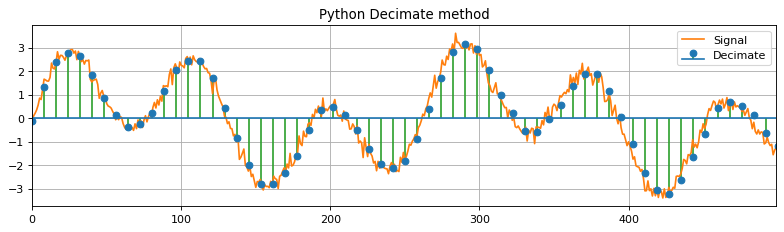

In [8]:
from scipy.signal import decimate

# Input signal
N = 500
tt = np.linspace(0, 1, N)
x = 1.5 * np.sin(4 * np.pi * tt) + 1.9 * np.sin(11.3 * np.pi * tt) + 0.2 * np.random.randn(N)

# Decimation
y = decimate(x, q=8, n=8)
ty = np.linspace(0, 1, y.size)

# Plot figure
plt.figure(figsize=(12, 3), dpi=80)
plt.title('Python Decimate method')
plt.plot(x, '-', color='C1', label='Signal')
plt.stem(np.linspace(0, N, y.size), y, use_line_collection=True, linefmt='C2', basefmt='C0', label='Decimate')
plt.xlim([0, N-1])
plt.legend(loc='upper right')
plt.grid(True)

#### Ресемплинг

Метод `resample` позволяет изменить частоту дискретизации в дробное число раз

 - `x` - входной сигнал (одномерный или многомерный вектор данных)
 - `num` - количество отсчетов в выходном сигнале
 - `t` - массив временных меток для выходного сигнала
 - `axis` - ось, вдоль которой производится децимация (для многомерных массивов)
 - `window` - оконная функция, применяемая в методе Фурье при расчете выходного массива
 
### Децимация и интерполяция  с помощью resample

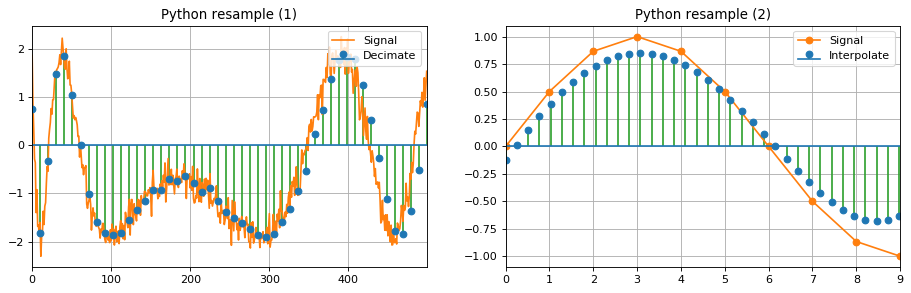

In [9]:
from scipy.signal import resample

# Input signal
N = 500
tt = np.linspace(0, 1, N)
np.random.seed(1)
x = 1.9 * np.sin(10.3 * np.pi * tt ** tt) + 0.2 * np.random.randn(N)

y = resample(x, num=50, window='blackmanharris')
ty = np.linspace(0, 1, y.size)

# Plot figure
plt.figure(figsize=(14, 4), dpi=80)
plt.subplot(1, 2, 1)
plt.title('Python resample (1)')
plt.plot(x, '-', color='C1', label='Signal')
plt.stem(np.linspace(0, N, y.size), y, use_line_collection=True, linefmt='C2', basefmt='C0', label='Decimate')
plt.xlim([0, N-1])
plt.legend(loc='upper right')
plt.grid(True)

# Input signal
N = 10
tt = np.linspace(0, 1, N)
x = np.sin(1.5 * np.pi * tt)

y = resample(x, num=40, window='blackmanharris')
ty = np.linspace(0, 1, y.size)

# Plot figure
plt.subplot(1, 2, 2)
plt.title('Python resample (2)')
plt.plot(x, '-o', color='C1', label='Signal')
plt.stem(np.linspace(0, N, y.size), y, use_line_collection=True, linefmt='C2', basefmt='C0', label='Interpolate')
plt.xlim([0, N-1])
plt.legend(loc='upper right')
plt.grid(True)

Метод `upfirdn` производит обработку в три стадии: интерполяция, фильтрация (КИХ), децимация сигнала.

- `h` - коэффициенты КИХ-фильтра
- `x` - входной сигнал (одномерный или многомерный вектор данных)
- `up` - коэффициент интерполяции
- `down` - коэффициент децимации
- `axis` - ось, вдоль которой производится децимация (для многомерных массивов)

Метод `resample_poly` изменяет количество отсчетов входного сигнала с использованием полифазного фильтра
- `x` - входной сигнал (одномерный или многомерный вектор данных)
- `up` - коэффициент интерполяции
- `down` - коэффициент децимации
- `axis` - ось, вдоль которой производится децимация (для многомерных массивов)
- `window` - оконная функция


### Фильтр скользящего среднего

Фильтр скользящего среднего (*Moving average filter, MAF*) - разновидность КИХ-фильтров (в некоторых случаях БИХ-фильтров). Отличительной особенностью фильтра скользящего среднего является равенство единице суммы коэффициентов.

$ \sum_{k=0}^{N-1}b_{k} = 1 $

Как было сказано в предыдущих разделах, КИХ фильтры можно привести к рекурсивному виду. Рассмотрим следующий пример. Запишем передаточную характеристику фильтра: 

$ H(z) = 1 + z^{-1} + z^{-2} + z^{-3} $,  

Домножим передаточную функцию на 

$ \frac{1 - z^{-1}}{(1 - z^{-1}} $. 

Пропустим математические выкладки (при желании, это можно сделать самостоятельно ввиду тривиальности рассматриваемой задачи) и запишем результат:

$ H(z) = \frac{1 + z^-3}{1 - z^-1} $

Структурная схема такого фильтра представлена на следующем рисунке. Она состоит из двух цепей: звено без обратной связи - дифференцирующее, а звено с обратной связью - интегрирующее (сумматор с обратной связью).

<img src="https://raw.githubusercontent.com/capitanov/dsp-theory/master/img/fir_recursive.svg?sanitize=true" alt="FIR Recursive" style="width: 70%;"/>

### Python реализация

Таким образом, фильтр скользящего среднего можно реализовать с помощью прямого КИХ-фильтра, либо с помощью рекурсивной формы. Параметр $M$ - величина задержки в дифференцирующем звене. Кроме того, фильтр скользящего среднего можно реализовать с помощью операции **свертки сигналов** (что по сути эквиваленто реализации с помощью КИХ-фильтра в прямой форме). В качестве **ядра свертки** выступает массив единиц. 
Ниже представлено несколько реализаций фильтра скользящего среднего на Python

In [10]:
class MafFilter:
    """
    Moving average filter:
    
    M - moving-average step (delay in comb stage)

    Parameters
    ----------
    x : np.array
        input 1-D signal
    """

    def __init__(self, x):
        self.x = x

    def maf_conv(self, m=2):
        """
        Calculate moving average filter via convolution

        Parameters
        ----------
        m : int
            moving average step
        """
        coe = np.ones(m) / m
        return np.convolve(self.x, coe, mode='same')       
        
    def maf_fir(self, m=2):
        """
        Calculate moving average filter as FIR

        Parameters
        ----------
        m : int
            moving average step
        """
        return lfilter(np.ones(M-1), 1, self.x)     

    def maf_iir(self, m=2):
        """
        Calculate moving average filter as FIR

        Parameters
        ----------
        m : int
            moving average step
        """
        # Change to recursive form
        a = [1, -1]
        b = np.zeros(M)
        b[0], b[-1] = a
        return lfilter(b, a, self.x)

### Пример фильтрации

На следующем примере можно видеть "сглаживающий" эффект фильтра скользящего среднего. Чем выше порядок фильтра - тем лучше проявляется эффект сглаживания.

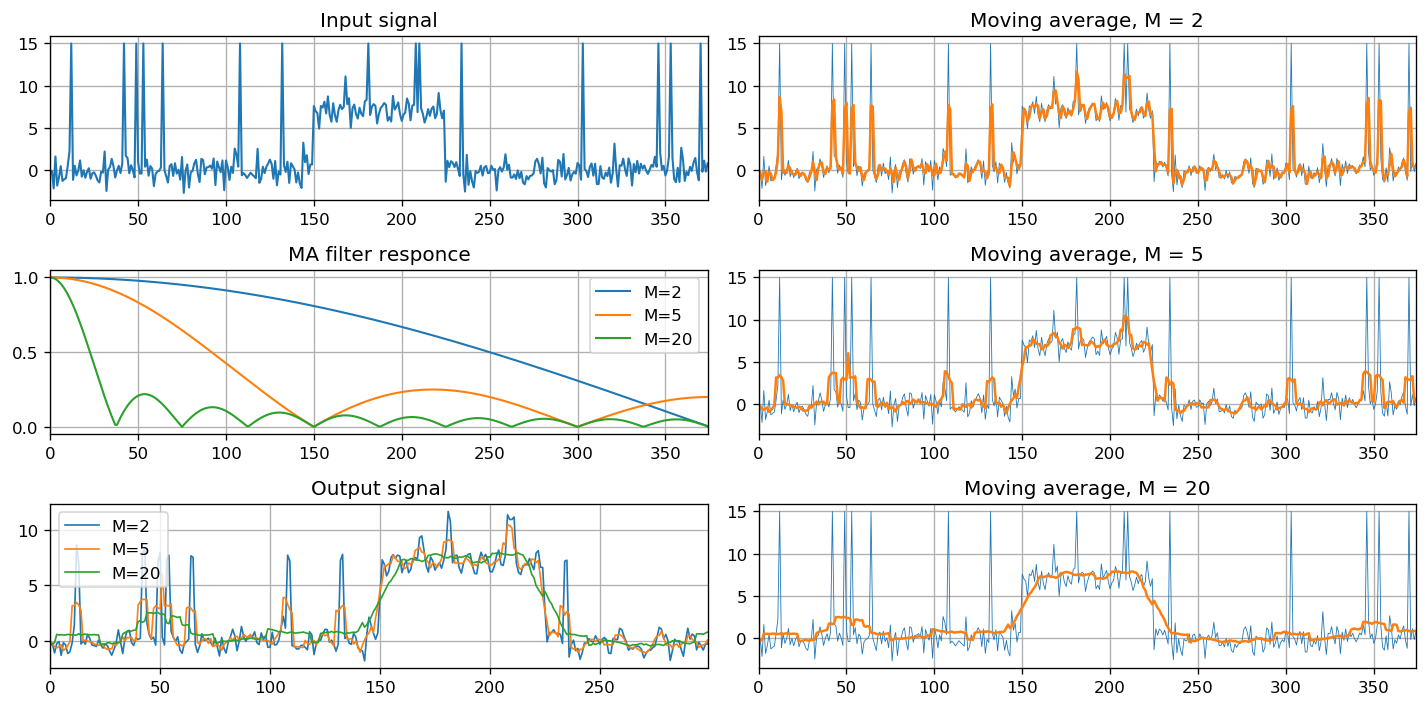

In [11]:
N = 300             # Number of samples
M = (2, 5, 20)      # Moving average step

LM = len(M)         # Size of M

# Input signal w/ noise:
sig = np.concatenate(
    (
        np.zeros(int(N/2)),
        np.ones(int(N/4)) * 7,
        np.zeros(int(N/2)))
)

lns = sig.size  # Size of signal

# Add some noise and peaks
np.random.seed(2)
sig += np.random.randn(lns)             # Add Gaussian noise
rnd = np.random.randint(0, lns, 15)     # Add random numbers for index
sig[rnd] = 15                           # Add peaks

# Calculate Moving Average filter:

filt = MafFilter(sig)
res = np.zeros((lns, LM))
for i in range(LM):
    res[:, i] = filt.maf_conv(m=M[i])

# Calculate Frequency responce:
hfq = np.zeros((lns, LM))
for j in range(LM):
    for i in range(lns):
        if i == 0:
            hfq[i, j] = 1
        else:
            hfq[i, j] = np.abs(np.sin(np.pi * M[j] * i / 2 / lns) / M[j] /
                               np.sin(np.pi * i / 2 / lns))

# Calculate spectrum of input signal:
fft_sig = np.abs(fft(sig))
fft_sig /= np.max(fft_sig)

# Calculate spectrum of output signal:
fft_out = np.zeros((lns, LM))
for i in range(LM):
    fft_out[:, i] = np.abs(fft(res[:, i]))
    fft_out[:, i] /= np.max(fft_out[:, i])

# Plot results:
plt.figure(figsize=(12, 6), dpi=120)
plt.subplot(3, 2, 1)
plt.plot(sig, linewidth=1.25)
plt.title('Input signal')
plt.grid()
plt.xlim([0, lns-1])

plt.subplot(3, 2, 3)
for i in range(LM):
    plt.plot(hfq[:, i], linewidth=1.25, label="M=%d" % M[i])
plt.title('MA filter responce')
plt.grid()
plt.legend(loc=1)
plt.xlim([0, lns-1])

plt.subplot(3, 2, 5)
for i in range(LM):
    plt.plot(res[:, i], linewidth=1.0, label="M=%d" % M[i])
plt.title('Output signal')
plt.grid()
plt.legend(loc=2)
plt.xlim([0, N-1])

for i in range(LM):
    plt.subplot(3, 2, 2*i+2)
    plt.plot(sig, '-', linewidth=0.5)
    plt.plot(res[:, i], linewidth=1.5)
    plt.title('Moving average, M = %d' % M[i])
    plt.grid()
    plt.xlim([0, lns-1])

plt.tight_layout()